In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
seed = 2021
np.random.seed(seed)
tf.random.set_seed(seed)

# MNIST handwriting - CNN

In [ ]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


## Preprocessing

### Standardization as 0 ~ 1

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

### Dimensionality expansion

In [ ]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

### One-hot encoding

In [ ]:
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## Processing

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

## Dropout

- 2 Conv2D layers with padding
- 1 MaxPooling2D layer
- 1 Dropout(0.25) layer
- 1 Fully Connected Network(512) layer
- 1 Dropout(0.5) layer
- 1 Output layer

In [ ]:
from tensorflow.keras.layers import Dropout

model2 = Sequential([
                    Conv2D(32, (3, 3), input_shape = (28, 28, 1),
                           activation = 'relu', padding = 'same'),
                    Conv2D(64, (3, 3), activation = 'relu'),
                    MaxPooling2D(pool_size = 2),
                    Dropout(0.25),
                    Flatten(),  # 2D -> 1D
                    Dense(512, activation = 'relu'),
                    Dropout(0.5),
                    Dense(10, activation = 'softmax')
])
model2.summary()

TypeError: ignored

In [ ]:
model2.compile(
    optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy']
)

In [ ]:
modelpath2 = '/content/drive/MyDrive/colab/2. CNN/Models/best_CNN2.h5'
checkpoint2 = ModelCheckpoint(modelpath2, verbose = 1, save_best_only = True)
earlystopping2 = EarlyStopping(patience = 10)

In [ ]:
history2 = model2.fit(
    X_train, Y_train, validation_split = 0.2, epochs = 50, batch_size = 200,
    verbose = 0, callbacks = [checkpoint2, earlystopping2]
)


Epoch 00001: val_loss improved from inf to 0.05690, saving model to /content/drive/MyDrive/colab/2. CNN/Models/best_CNN2.h5

Epoch 00002: val_loss improved from 0.05690 to 0.04607, saving model to /content/drive/MyDrive/colab/2. CNN/Models/best_CNN2.h5

Epoch 00003: val_loss improved from 0.04607 to 0.04418, saving model to /content/drive/MyDrive/colab/2. CNN/Models/best_CNN2.h5

Epoch 00004: val_loss improved from 0.04418 to 0.03294, saving model to /content/drive/MyDrive/colab/2. CNN/Models/best_CNN2.h5

Epoch 00005: val_loss did not improve from 0.03294

Epoch 00006: val_loss did not improve from 0.03294

Epoch 00007: val_loss did not improve from 0.03294

Epoch 00008: val_loss did not improve from 0.03294

Epoch 00009: val_loss improved from 0.03294 to 0.03213, saving model to /content/drive/MyDrive/colab/2. CNN/Models/best_CNN2.h5

Epoch 00010: val_loss did not improve from 0.03213

Epoch 00011: val_loss did not improve from 0.03213

Epoch 00012: val_loss did not improve from 0.0

In [ ]:
from tensorflow.keras.models import load_model
best_model2 = load_model(modelpath2)
best_model2.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0249 - accuracy: 0.9924


[0.024942291900515556, 0.9923999905586243]

### Visualization

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
y_vloss = history2.history['val_loss']
y_acc = history2.history['accuracy']
x_len = np.arange(len(y_acc))

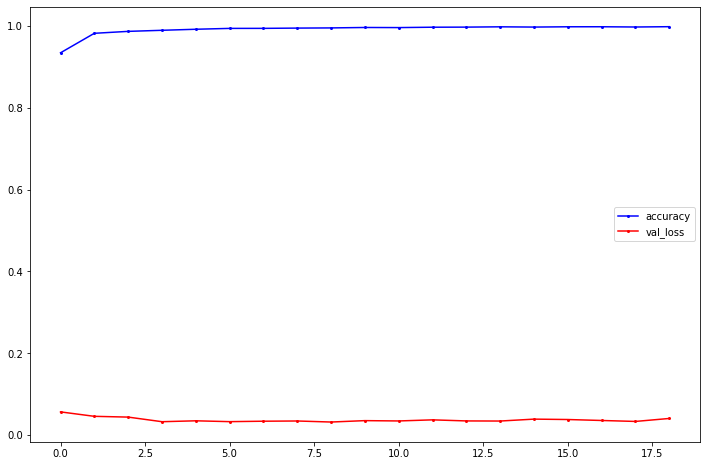

In [ ]:
plt.figure(figsize = (12, 8))
plt.plot(x_len, y_acc, 'bo-', markersize = 2, label = 'accuracy')
plt.plot(x_len, y_vloss, 'ro-', markersize = 2, label = 'val_loss')
plt.legend()
plt.show()